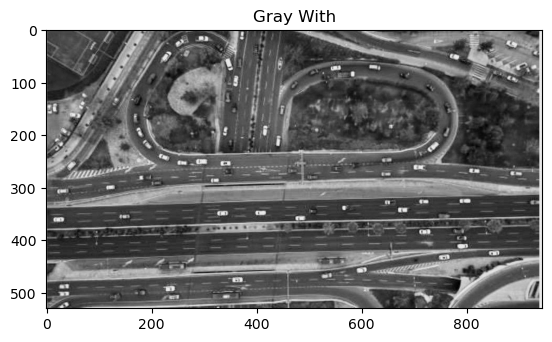

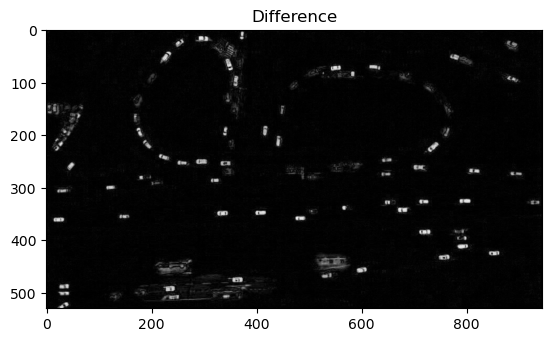

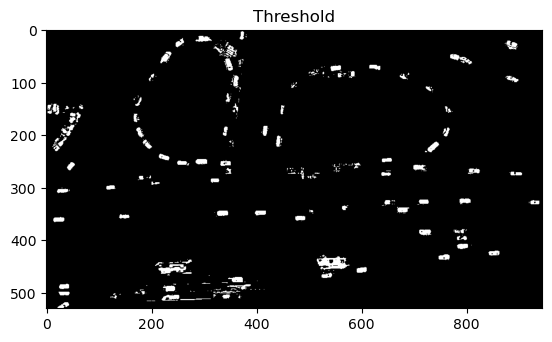

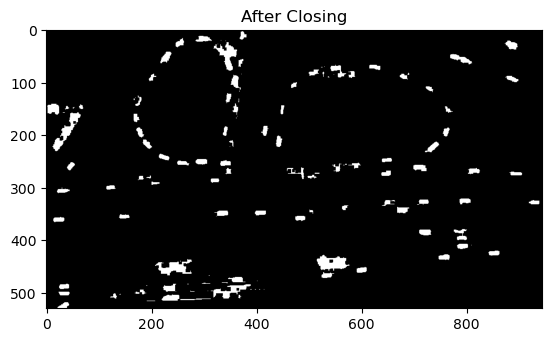

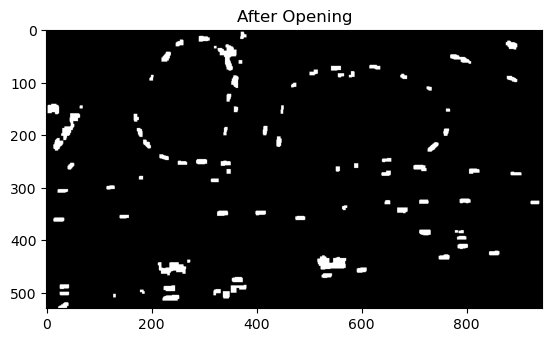

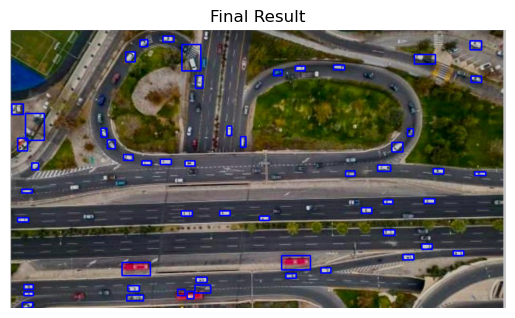

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img_with = cv2.imread("img.jpeg")
img_empty = cv2.imread("empty.jpeg")


img_with = cv2.resize(img_with, (img_empty.shape[1], img_empty.shape[0]))


def to_grayscale(image):
    return (0.299 * image[:, :, 2] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 0]).astype(np.uint8)

gray_with = to_grayscale(img_with)
gray_empty = to_grayscale(img_empty)


diff = np.abs(gray_with.astype(np.int16) - gray_empty.astype(np.int16)).astype(np.uint8)


thresh = np.where(diff > 30, 255, 0).astype(np.uint8)


kernel = np.ones((5, 5), np.uint8)


def dilate(img, kernel):
    pad = kernel.shape[0] // 2
    padded = np.pad(img, pad, mode='constant', constant_values=0)
    out = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            out[i, j] = np.max(region * kernel)
    return out

def erode(img, kernel):
    pad = kernel.shape[0] // 2
    padded = np.pad(img, pad, mode='constant', constant_values=255)
    out = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            out[i, j] = np.min(region * kernel)
    return out


closed = dilate(thresh, kernel)
closed = erode(closed, kernel)

opened = erode(closed, kernel)
opened = dilate(opened, kernel)

contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    area = cv2.contourArea(cnt)
    if 100 < area < 2500:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_with, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(gray_with, cmap="gray"); plt.title("Gray With"); plt.show()
plt.imshow(diff, cmap="gray"); plt.title("Difference"); plt.show()
plt.imshow(thresh, cmap="gray"); plt.title("Threshold"); plt.show()
plt.imshow(closed, cmap="gray"); plt.title("After Closing"); plt.show()
plt.imshow(opened, cmap="gray"); plt.title("After Opening"); plt.show()
plt.imshow(cv2.cvtColor(img_with, cv2.COLOR_BGR2RGB)); plt.title("Final Result"); plt.axis("off"); plt.show()
